Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'MIOTA'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2017-06-12,0.638503,0.652862,0.533910,0.590255,0.590255,25425600.0,MIOTA-USD
2017-06-13,0.592347,0.606196,0.495745,0.528916,0.528916,14194900.0,MIOTA-USD
2017-06-14,0.528284,0.543165,0.300365,0.363661,0.363661,10300400.0,MIOTA-USD
2017-06-15,0.353285,0.448249,0.309852,0.410757,0.410757,6920690.0,MIOTA-USD
2017-06-16,0.426762,0.444205,0.414139,0.419906,0.419906,3100660.0,MIOTA-USD
...,...,...,...,...,...,...,...
2021-07-02,0.827826,0.847473,0.799677,0.829169,0.829169,28133181.0,MIOTA-USD
2021-07-03,0.830209,0.877730,0.797663,0.844145,0.844145,37850311.0,MIOTA-USD
2021-07-04,0.844715,0.868300,0.810015,0.820022,0.820022,39787635.0,MIOTA-USD
2021-07-05,0.820371,0.882165,0.820371,0.851735,0.851735,38663874.0,MIOTA-USD


In [15]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1486 entries, 2017-06-12 to 2021-07-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1482 non-null   float64
 1   high      1482 non-null   float64
 2   low       1482 non-null   float64
 3   close     1482 non-null   float64
 4   adjclose  1482 non-null   float64
 5   volume    1482 non-null   float64
 6   ticker    1486 non-null   object 
 7   spread    1482 non-null   float64
dtypes: float64(7), object(1)
memory usage: 136.8+ KB


## Plot the closing value of Iota over time

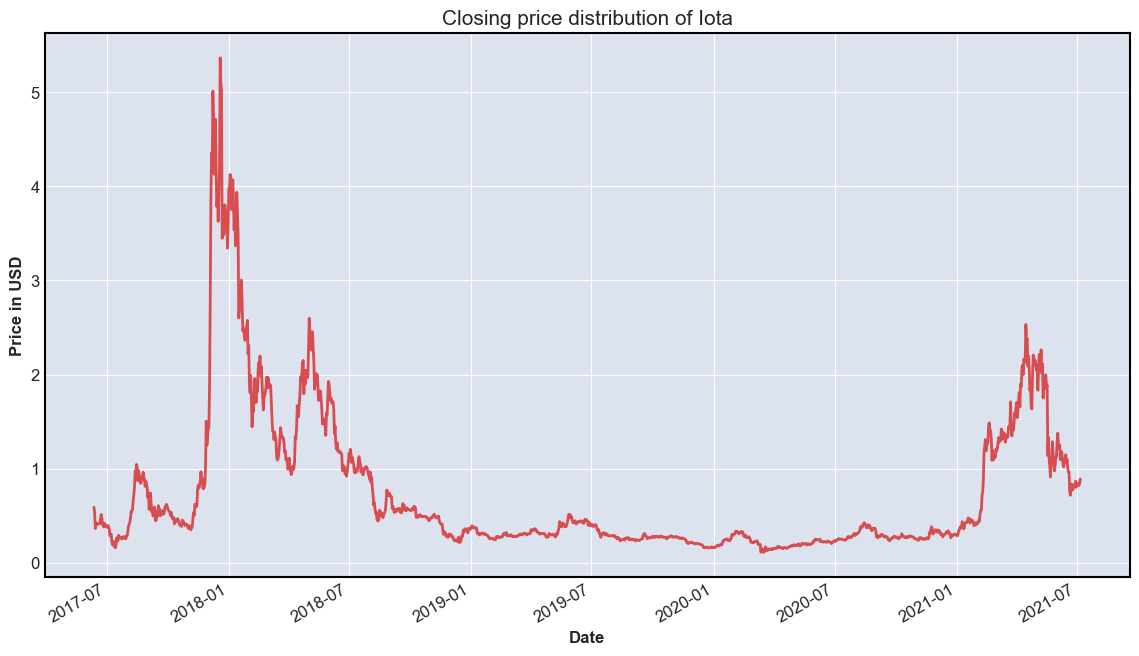

In [16]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Iota", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of Iota')

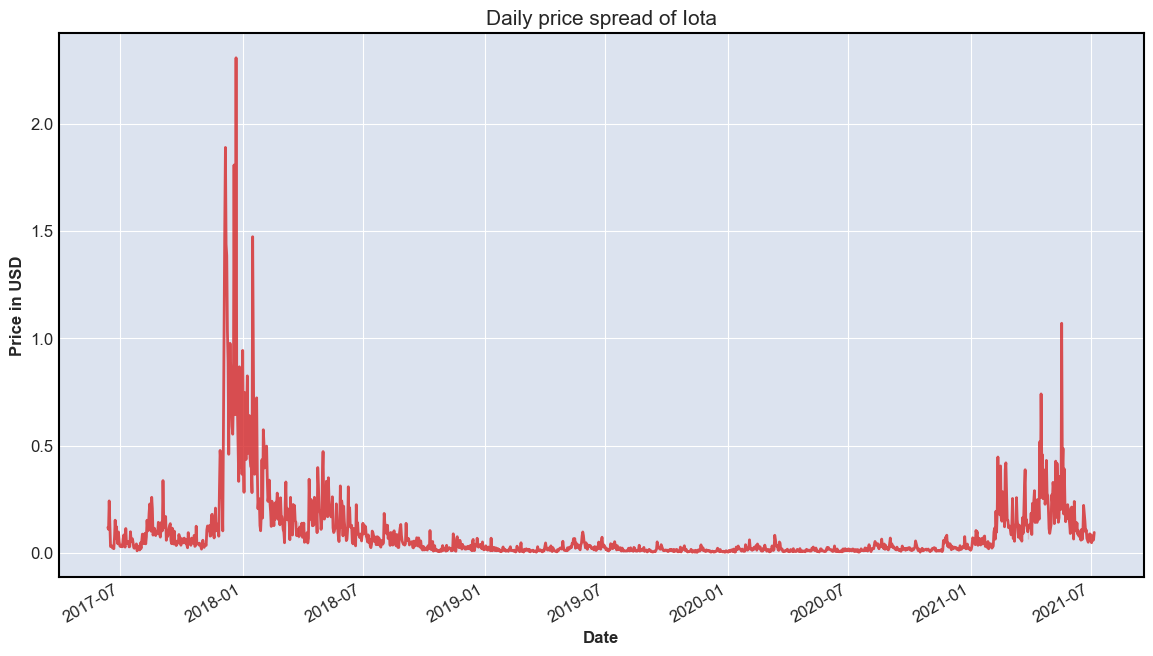

In [17]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of Iota", fontsize=15)

## Candlestick chart

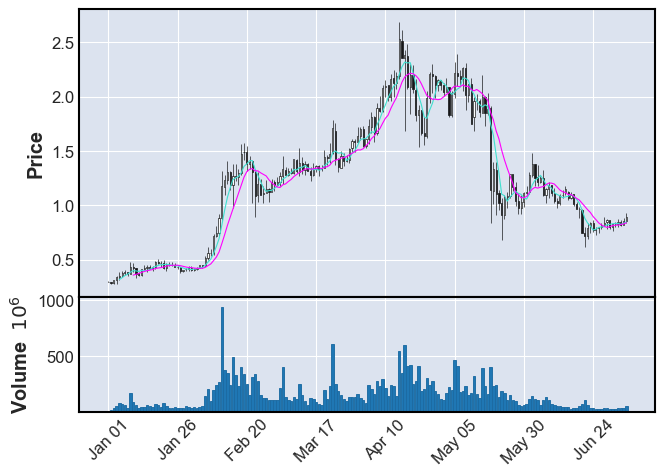

In [18]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2017-06-12,0.590255
1,2017-06-13,0.528916
2,2017-06-14,0.363661
3,2017-06-15,0.410757
4,2017-06-16,0.419906
...,...,...
1481,2021-07-02,0.829169
1482,2021-07-03,0.844145
1483,2021-07-04,0.820022
1484,2021-07-05,0.851735


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1507,2021-08-01,0.511640,0.151095,0.823441
1508,2021-08-02,0.513595,0.158994,0.840295
1509,2021-08-03,0.520019,0.167932,0.847586
1510,2021-08-04,0.520068,0.133991,0.866236
1511,2021-08-05,0.513395,0.144671,0.852306


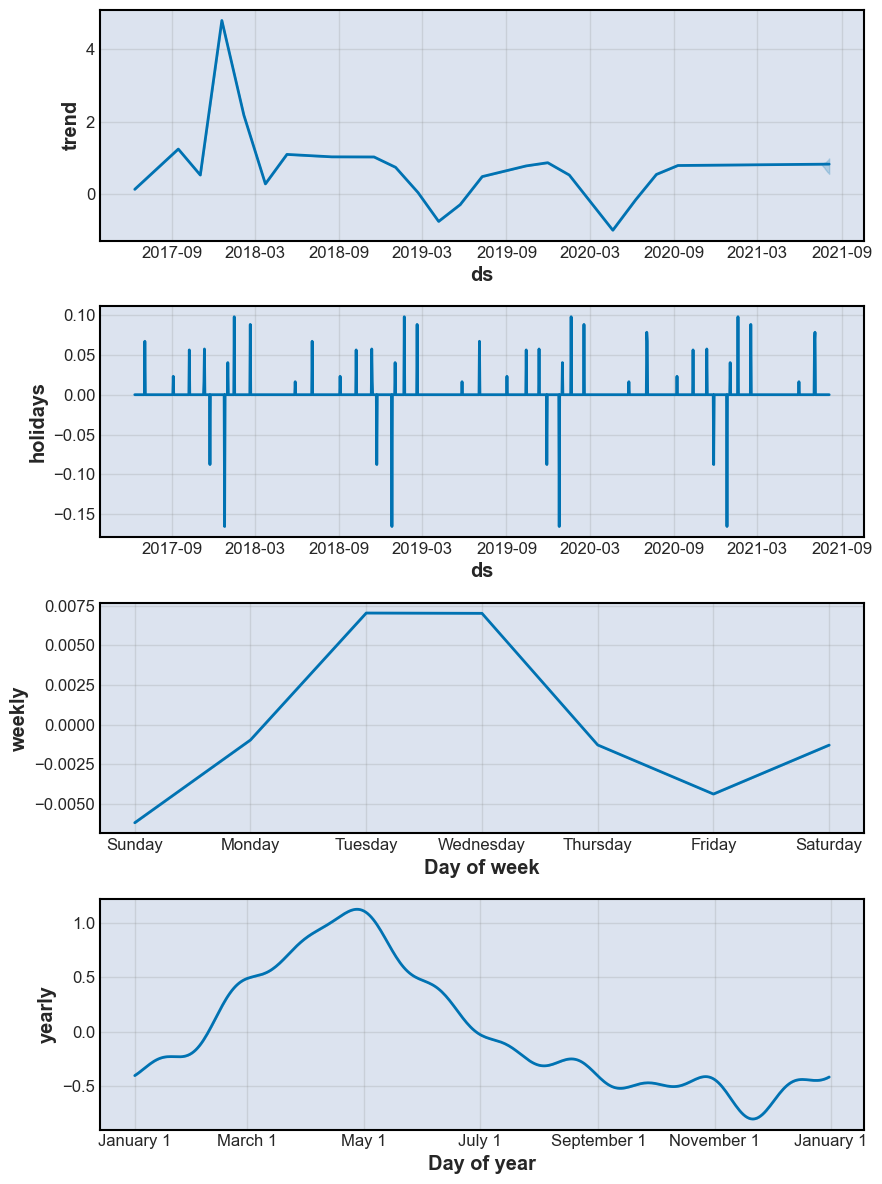

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

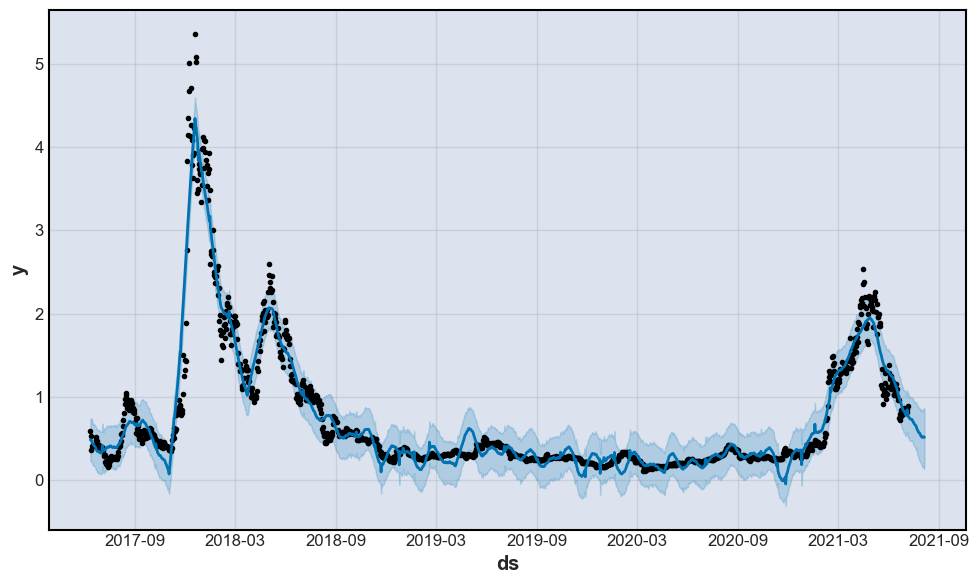

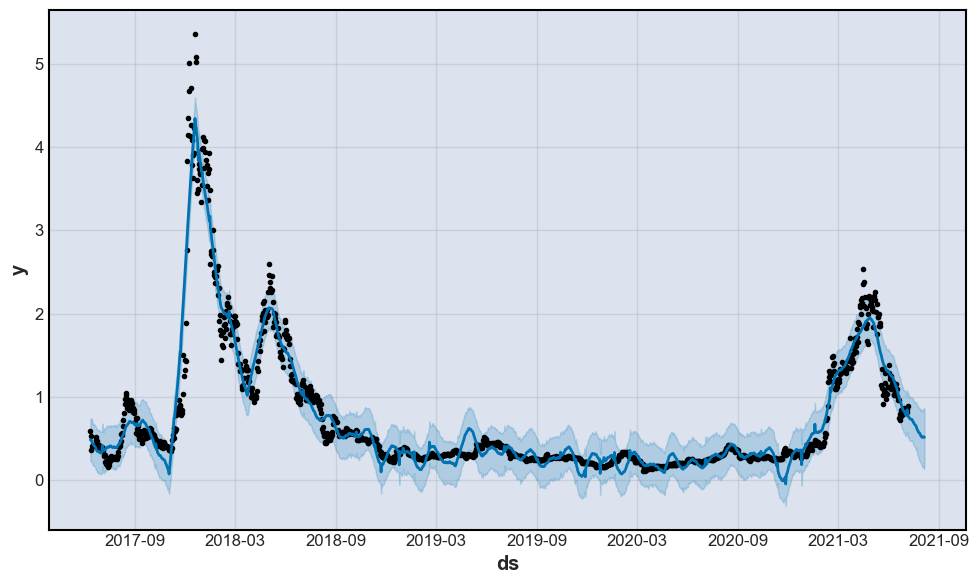

In [10]:
m.plot(forecast)